In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('/kaggle/input/ai-agricultural-yield-predictor/egypt_local_crop_prices_2023_2025.csv')

In [3]:
df.head()

,Date,Crop,Price_per_Ton_EGP
0,2023-01-01,Wheat (قمح),9044.96
1,2023-01-02,Wheat (قمح),9033.04
2,2023-01-03,Wheat (قمح),9092.10
3,2023-01-04,Wheat (قمح),9230.21
4,2023-01-05,Wheat (قمح),9210.42


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price_per_Ton_EGP,8768.0,9295.196036,5486.976107,1902.52,4890.485,7985.585,12703.41,23547.99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8768 non-null   object 
 1   Crop               8768 non-null   object 
 2   Price_per_Ton_EGP  8768 non-null   float64
dtypes: float64(1), object(2)
memory usage: 205.6+ KB


In [6]:
df.isnull().sum()

Date                 0
Crop                 0
Price_per_Ton_EGP    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])


In [11]:
print(df.head())

        Date         Crop  Price_per_Ton_EGP
0 2023-01-01  Wheat (قمح)            9044.96
1 2023-01-02  Wheat (قمح)            9033.04
2 2023-01-03  Wheat (قمح)            9092.10
3 2023-01-04  Wheat (قمح)            9230.21
4 2023-01-05  Wheat (قمح)            9210.42


In [13]:
avg_prices = df.groupby('Crop')['Price_per_Ton_EGP'].mean().sort_values(ascending=False)
print(avg_prices)

Crop
Cotton (قطن)               20026.821195
Rice (أرز)                 13205.100000
Maize (ذرة صفراء)          12092.017819
Wheat (قمح)                10088.316177
Potato (بطاطس)              6311.324142
Tomato (طماطم)              5002.749708
Onion (بصل)                 4962.396515
Sugar Beet (بنجر السكر)     2672.842728
Name: Price_per_Ton_EGP, dtype: float64


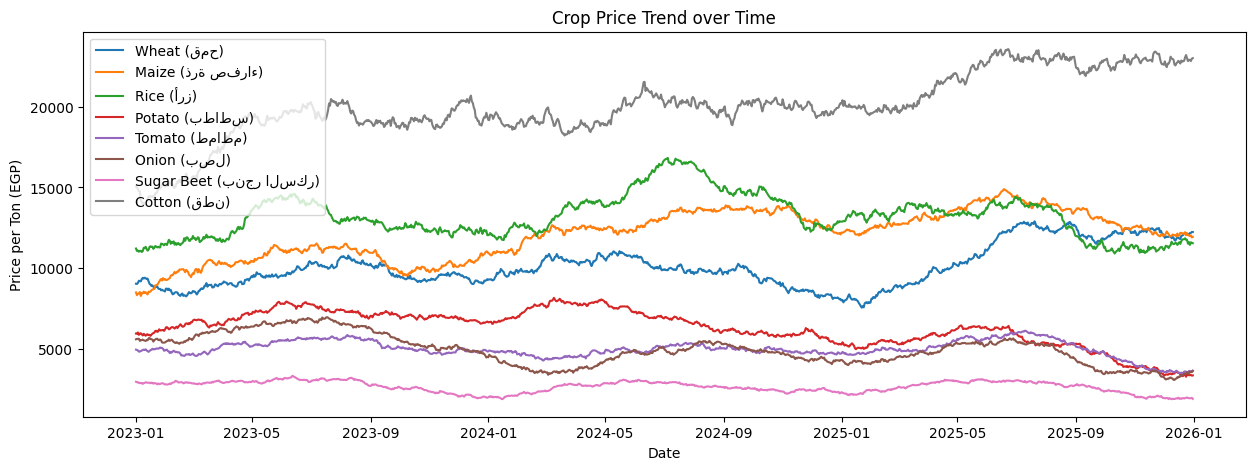

In [14]:
plt.figure(figsize=(15,5))
for crop in df['Crop'].unique():
    crop_data = df[df['Crop']==crop]
    crop_data = crop_data.sort_values('Date')
    plt.plot(crop_data['Date'], crop_data['Price_per_Ton_EGP'], label=crop)

plt.xlabel("Date")
plt.ylabel("Price per Ton (EGP)")
plt.title("Crop Price Trend over Time")
plt.legend()
plt.show()

## Feature Engineering

In [15]:
price_features = df.groupby('Crop')['Price_per_Ton_EGP'].agg(['mean','std']).reset_index()
price_features.rename(columns={'mean':'Avg_Price','std':'Price_Std'}, inplace=True)
print(price_features)

                      Crop     Avg_Price    Price_Std
0             Cotton (قطن)  20026.821195  1983.484057
1        Maize (ذرة صفراء)  12092.017819  1468.535430
2              Onion (بصل)   4962.396515   943.494544
3           Potato (بطاطس)   6311.324142  1110.755230
4               Rice (أرز)  13205.100000  1332.179073
5  Sugar Beet (بنجر السكر)   2672.842728   346.710307
6           Tomato (طماطم)   5002.749708   508.079899
7              Wheat (قمح)  10088.316177  1267.758169
